In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install ayori library
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=5d6382f8434299e34e7c9aa74144bf9fcd2bc8afcc55ef77513ac0317da950df
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CURSOS/Maestria_inteligencia_artificial/modulo-IV/actividad-2/groceries - groceries.csv", encoding='unicode_escape')
df.head(25)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,whole milk,butter,yogurt,rice,abrasive cleaner,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,whole milk,cereals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

In [ ]:
df.describe()

,Item(s)
count,9835.000000
mean,4.409456
std,3.589385
min,1.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,32.000000


In [ ]:
df['Item(s)'].nunique()

29

In [ ]:
has_nah = df["Item(s)"].isna().any()
print(has_nah)

False


In [ ]:
frequency = df['Item(s)'].value_counts().sort_index()
print(frequency)

Item(s)
1     2159
2     1643
3     1299
4     1005
5      855
6      645
7      545
8      438
9      350
10     246
11     182
12     117
13      78
14      77
15      55
16      46
17      29
18      14
19      14
20       9
21      11
22       4
23       6
24       1
26       1
27       1
28       1
29       3
32       1
Name: count, dtype: int64


In [ ]:
single_item_transaction_percentage = frequency[1] / frequency.sum() * 100
print(single_item_transaction_percentage)

21.952211489578037


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


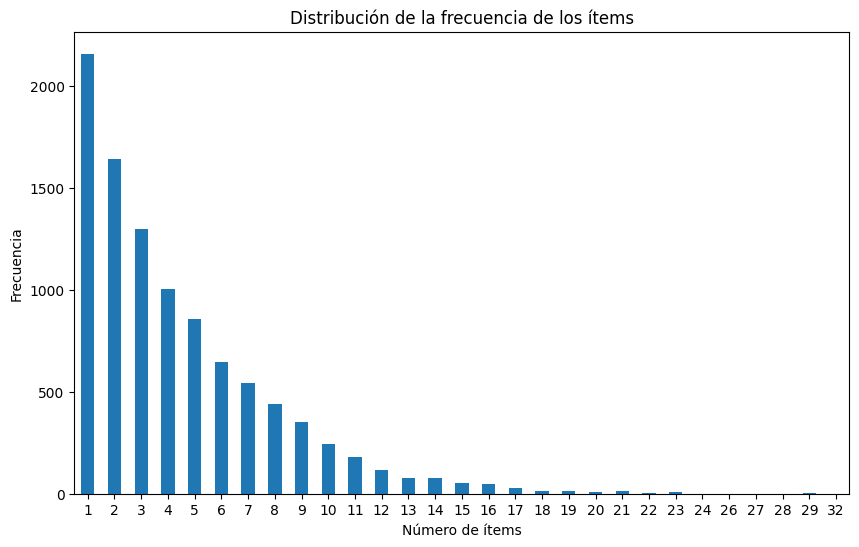

In [ ]:
# Crea un histograma para ver la distribución de frecuencia de los elementos.
plt.figure(figsize=(10, 6))

frequency.plot.bar()
plt.xlabel('Número de ítems')
plt.ylabel('Frecuencia')
plt.title('Distribución de la frecuencia de los ítems')
plt.xticks(rotation=0)
plt.show()

In [3]:
!pip install mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

In [4]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=7cf27155306a1bfde97454d7cf07983cde96887d11b69b5a40219e40fc6309f7
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
import networkx as nx
from collections import Counter
from google.colab import files

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#df = pd.read_csv("/kaggle/input/groceries/groceries - groceries.csv", header=None)
df = pd.read_csv("/content/drive/MyDrive/CURSOS/Maestria_inteligencia_artificial/modulo-IV/actividad-2/groceries - groceries.csv", encoding='unicode_escape', header=None)
df = df.drop(0, axis=1)
df = df.drop(0)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9831,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9835, 32)

In [ ]:
df.size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


314720

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


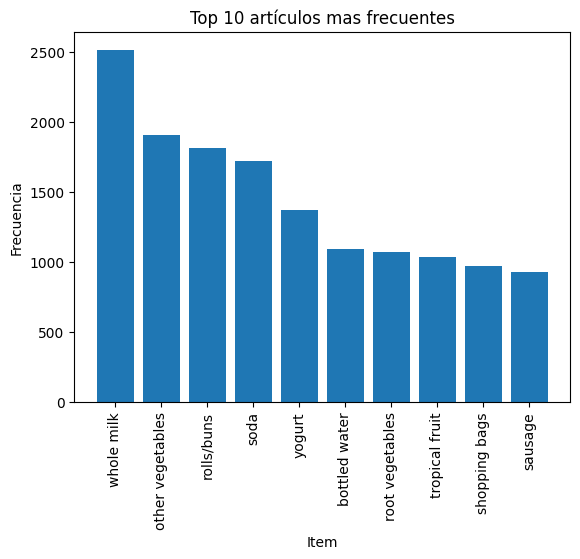

In [ ]:
# Item frequency analysis
item_counts = df.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)
top_items = item_counts.head(10)
plt.bar(top_items.index, top_items.values)
plt.xlabel('Item')
plt.ylabel('Frecuencia')
plt.title('Top 10 artículos mas frecuentes')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


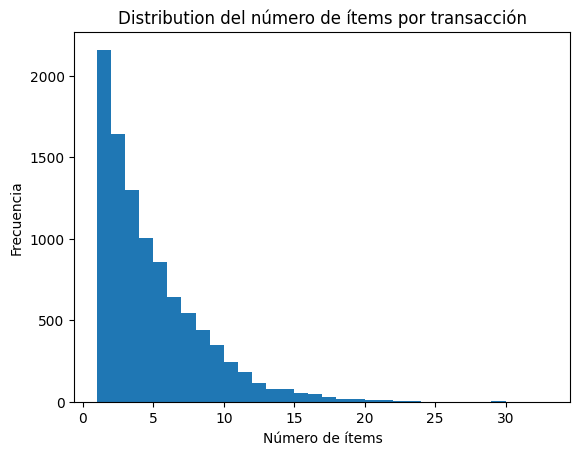

In [ ]:
# Transaction analysis
transaction_lengths = df.notnull().sum(axis=1)
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths) + 2))
plt.xlabel('Número de ítems')
plt.ylabel('Frecuencia')
plt.title('Distribution del número de ítems por transacción')
plt.show()

In [ ]:
# get data where the customer just bought 1 item
df2 = pd.read_csv("/content/drive/MyDrive/CURSOS/Maestria_inteligencia_artificial/modulo-IV/actividad-2/groceries - groceries.csv", encoding='unicode_escape')
df2.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#get data where the customer just bought 1 item
df_one_transaction = df2[df2['Item(s)'] == 1]
df_one_transaction

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,rolls/buns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,potted plants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,1,beef,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,1,fruit/vegetable juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,1,shopping bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9807,1,ice cream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9815,1,frozen meals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9818,1,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove the Item(s) column
df_groceries_sandalone = df_one_transaction.drop(["Item(s)"], axis=1)

item_counts_sandalone = Counter()

for column in df_groceries_sandalone.columns:
    column_values = df_groceries_sandalone[column].dropna().tolist()
    item_counts_sandalone.update(column_values)

# convert to Series and sort based on values
item_counts_sandalone_series = pd.Series(item_counts_sandalone).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# top 5 purchased products that customers wwho bought 1 items usually bought
top_5 = item_counts_sandalone_series.head(5)
print(top_5)

canned beer     260
soda            156
whole milk      121
bottled beer    120
rolls/buns      109
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


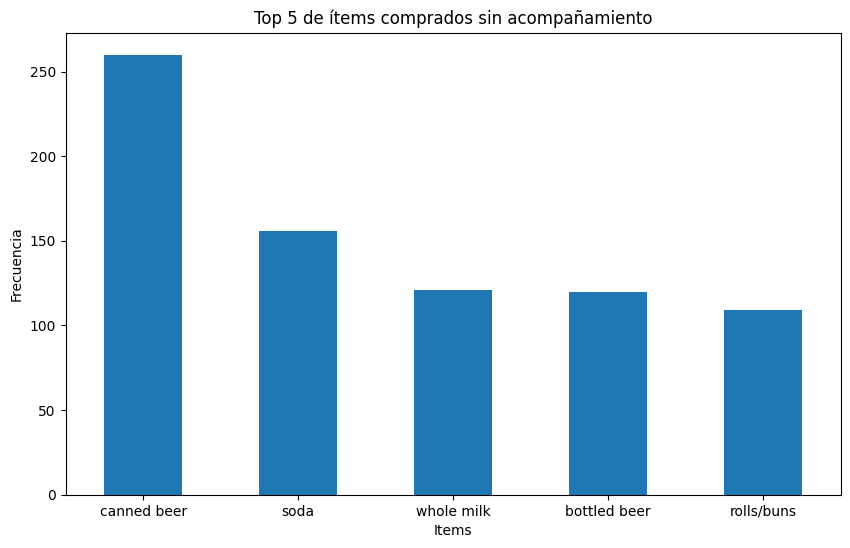

In [ ]:
plt.figure(figsize=(10, 6))

top_5.plot.bar()
plt.xlabel('Items')
plt.ylabel('Frecuencia')
plt.title('Top 5 de ítems comprados sin acompañamiento')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# convert the df into list of transactions
transactions = []
for index, row in df2.drop(["Item(s)"], axis=1).iterrows():
    transactions.append([item for item in row if pd.notna(item)])
transactions[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']

In [ ]:
df_transactions = pd.DataFrame(transactions)
df_transactions.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,tropical fruit,yogurt,coffee,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,whole milk,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,pip fruit,yogurt,cream cheese,meat spreads,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,other vegetables,whole milk,condensed milk,long life bakery product,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,whole milk,butter,yogurt,rice,abrasive cleaner,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,rolls/buns,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer),None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,potted plants,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,whole milk,cereals,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_data, columns = te.columns_)
df_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_encoded.to_csv('grocery-encode.csv', index=False)
files.download('grocery-encode.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
transactions_df = pd.DataFrame(transactions)
transactions_df.to_csv('groceriesTransaction.csv', index=False)
files.download('groceriesTransaction.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
1,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transactions = []
for i in range(9835):
  transactions.append([str(df.values[i,j]) for j in range(32)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rules = apriori(transactions = transactions,
                min_support = 0.003,
                min_confidence = 0.2,
                min_lift = 3,
                min_length = 2,
                max_length = 2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
results = list(rules)
results[:3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[RelationRecord(items=frozenset({'Instant food products', 'hamburger meat'}), support=0.003050330452465684, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'hamburger meat'}), confidence=0.379746835443038, lift=11.42143769597027)]),
 RelationRecord(items=frozenset({'whipped/sour cream', 'baking powder'}), support=0.004575495678698526, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'whipped/sour cream'}), confidence=0.25862068965517243, lift=3.607850330154072)]),
 RelationRecord(items=frozenset({'root vegetables', 'beef'}), support=0.017386883579054397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'beef'}), items_add=frozenset({'root vegetables'}), confidence=0.3313953488372093, lift=3.0403668431100312)])]

In [ ]:
# Put the results well organised into a Pandas DataFrame
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results),
                                  columns = ['Product 1',
                                             'Product 2',
                                             'Support',
                                             'Confidence',
                                             'Lift'
                                            ])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Display the results non sorted
resultsinDataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product 1,Product 2,Support,Confidence,Lift
0,Instant food products,hamburger meat,0.003050,0.379747,11.421438
1,baking powder,whipped/sour cream,0.004575,0.258621,3.607850
2,beef,root vegetables,0.017387,0.331395,3.040367
3,berries,whipped/sour cream,0.009049,0.272171,3.796886
4,liquor,bottled beer,0.004677,0.422018,5.240594
5,red/blush wine,bottled beer,0.004881,0.253968,3.153760
6,flour,margarine,0.003762,0.216374,3.694516
7,flour,sugar,0.004982,0.286550,8.463112
8,flour,whipped/sour cream,0.004067,0.233918,3.263241
9,herbs,root vegetables,0.007016,0.431250,3.956477


In [ ]:
# Display the results sorted by descending lifts
resultsinDataFrame.nlargest(n = 13, columns = 'Lift')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Product 1,Product 2,Support,Confidence,Lift
0,Instant food products,hamburger meat,0.003050,0.379747,11.421438
7,flour,sugar,0.004982,0.286550,8.463112
10,processed cheese,white bread,0.004169,0.251534,5.975445
4,liquor,bottled beer,0.004677,0.422018,5.240594
9,herbs,root vegetables,0.007016,0.431250,3.956477
3,berries,whipped/sour cream,0.009049,0.272171,3.796886
11,rice,root vegetables,0.003152,0.413333,3.792102
6,flour,margarine,0.003762,0.216374,3.694516
1,baking powder,whipped/sour cream,0.004575,0.258621,3.607850
8,flour,whipped/sour cream,0.004067,0.233918,3.263241


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


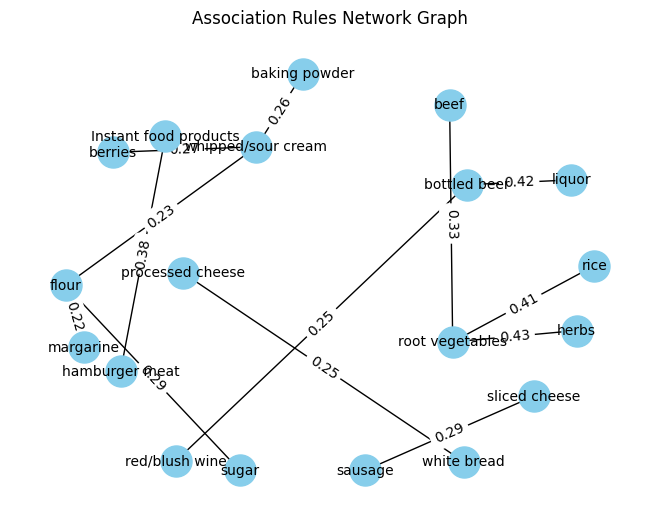

In [ ]:
# Association rules network graph
import math
resultsinDataFrame['Confidence'] = resultsinDataFrame['Confidence'].round(2)
G = nx.Graph()

for product in resultsinDataFrame['Product 1']:
    G.add_node(product)
for product in resultsinDataFrame['Product 2']:
    G.add_node(product)

for index, row in resultsinDataFrame.iterrows():
    G.add_edge(row['Product 1'], row['Product 2'], weight=row['Confidence'])

# pos = nx.spring_layout(G)
pos = nx.spring_layout(G, k=5/math.sqrt(G.order()))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Association Rules Network Graph')
plt.show()

In [6]:
df_fpgrowth = pd.read_csv("/content/drive/MyDrive/CURSOS/Maestria_inteligencia_artificial/modulo-IV/actividad-2/groceries - groceries.csv", encoding='unicode_escape')
df_fpgrowth.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
items = (df_fpgrowth['Item 1'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
encoded_vals = []
for index, row in df_fpgrowth.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
freq_items = fpgrowth(ohe_df, min_support=0.003, use_colnames=True)
freq_items.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.017692,(semi-finished bread)
3,0.139502,(yogurt)
4,0.104931,(tropical fruit)


In [11]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1)
rules.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
sr=[]
for row in rules.itertuples():
    if(len(getattr(row,'antecedents'))==2):
        sr.append(getattr(row,'Index'))
rules.iloc[sr].sort_values(by=['lift'],ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
147,"(root vegetables, tropical fruit)","(citrus fruit, other vegetables, whole milk)",0.021047,0.013015,0.003152,0.149758,11.506831,0.002878,1.160829,0.932726
148,"(citrus fruit, root vegetables)","(other vegetables, tropical fruit, whole milk)",0.017692,0.017082,0.003152,0.178161,10.429837,0.002850,1.195998,0.920405
149,"(citrus fruit, other vegetables)","(root vegetables, tropical fruit, whole milk)",0.028876,0.011998,0.003152,0.109155,9.097786,0.002806,1.109062,0.916550
151,"(citrus fruit, whole milk)","(other vegetables, root vegetables, tropical f...",0.030503,0.012303,0.003152,0.103333,8.399036,0.002777,1.101521,0.908656
607,"(root vegetables, yogurt)","(other vegetables, tropical fruit, whole milk)",0.025826,0.017082,0.003559,0.137795,8.066765,0.003118,1.140006,0.899259
...,...,...,...,...,...,...,...,...,...,...
205,"(citrus fruit, whole milk)",(soda),0.030503,0.174377,0.004474,0.146667,0.841088,-0.000845,0.967527,-0.163096
211,"(citrus fruit, other vegetables)",(soda),0.028876,0.174377,0.004169,0.144366,0.827896,-0.000867,0.964925,-0.176319
2829,"(shopping bags, sausage)",(whole milk),0.015658,0.255516,0.003254,0.207792,0.813226,-0.000747,0.939758,-0.189183
1664,"(curd, whole milk)",(soda),0.026131,0.174377,0.003559,0.136187,0.780989,-0.000998,0.955789,-0.223573


In [ ]:
df_fpgrowth_result = pd.DataFrame(rules)
df_fpgrowth_result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008,0.334375
1,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577,0.411963
2,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467,0.509009
3,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803,0.542570
4,(citrus fruit),(tropical fruit),0.082766,0.104931,0.019929,0.240786,2.294702,0.011244,1.178942,0.615125
...,...,...,...,...,...,...,...,...,...,...
4516,(roll products),(other vegetables),0.010269,0.193493,0.004779,0.465347,2.404983,0.002792,1.508467,0.590258
4517,(roll products),(root vegetables),0.010269,0.108998,0.003152,0.306931,2.815917,0.002033,1.285588,0.651567
4518,(roll products),(whole milk),0.010269,0.255516,0.004677,0.455446,1.782454,0.002053,1.367143,0.443531
4519,(mayonnaise),(whole milk),0.009151,0.255516,0.003355,0.366667,1.435005,0.001017,1.175501,0.305938


In [ ]:
df_result = pd.concat([df_fpgrowth_result['antecedents'], df_fpgrowth_result['consequents'], df_fpgrowth_result['support'], df_fpgrowth_result['confidence'], df_fpgrowth_result['lift'], df_fpgrowth_result['leverage'], df_fpgrowth_result['conviction']], axis=1)
df_result.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction
0,(citrus fruit),(whole milk),0.030503,0.368550,1.442377,0.009355,1.179008
1,(whole milk),(citrus fruit),0.030503,0.119379,1.442377,0.009355,1.041577
2,(citrus fruit),(yogurt),0.021657,0.261671,1.875752,0.010111,1.165467
3,(yogurt),(citrus fruit),0.021657,0.155248,1.875752,0.010111,1.085803
4,(citrus fruit),(tropical fruit),0.019929,0.240786,2.294702,0.011244,1.178942
5,(tropical fruit),(citrus fruit),0.019929,0.189922,2.294702,0.011244,1.132280
6,(bottled water),(citrus fruit),0.013523,0.122355,1.478332,0.004376,1.045109
7,(citrus fruit),(bottled water),0.013523,0.163391,1.478332,0.004376,1.063192
8,(citrus fruit),(pastry),0.009761,0.117936,1.325602,0.002398,1.032841
9,(pastry),(citrus fruit),0.009761,0.109714,1.325602,0.002398,1.030270


In [ ]:
df_sorted = df_result.sort_values(by=['lift'], ascending=False)
df_sorted.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift,leverage,conviction
147,"(root vegetables, tropical fruit)","(citrus fruit, other vegetables, whole milk)",0.003152,0.149758,11.506831,0.002878,1.160829
145,"(citrus fruit, other vegetables, whole milk)","(root vegetables, tropical fruit)",0.003152,0.242188,11.506831,0.002878,1.291814
4454,(Instant food products),(hamburger meat),0.003050,0.379747,11.421438,0.002783,1.558640
148,"(citrus fruit, root vegetables)","(other vegetables, tropical fruit, whole milk)",0.003152,0.178161,10.429837,0.002850,1.195998
144,"(other vegetables, tropical fruit, whole milk)","(citrus fruit, root vegetables)",0.003152,0.184524,10.429837,0.002850,1.204582
142,"(citrus fruit, root vegetables, whole milk)","(other vegetables, tropical fruit)",0.003152,0.344444,9.596632,0.002824,1.470673
141,"(root vegetables, tropical fruit, whole milk)","(citrus fruit, other vegetables)",0.003152,0.262712,9.097786,0.002806,1.317156
149,"(citrus fruit, other vegetables)","(root vegetables, tropical fruit, whole milk)",0.003152,0.109155,9.097786,0.002806,1.109062
1690,(sugar),(flour),0.004982,0.147147,8.463112,0.004394,1.152148
1689,(flour),(sugar),0.004982,0.286550,8.463112,0.004394,1.354182
